In [34]:
import numpy as np 
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('Apparel/apparel-trainval.csv')
label=df['label']
df.head()
err_list=[]
# np.unique(label)

In [36]:
# train_df1=df[0:48000]
# validate_df1=df[48000:60000]
# train_label=train_df1['label']
# validate_label=validate_df1['label']
# train_df1=train_df1.drop('label',axis=1)
# validate_df1=validate_df1.drop('label',axis=1)
# feature_set=train_df1
# instances = feature_set.shape[0]  
# attributes = feature_set.shape[1] 
# validate_instances=validate_df1.shape[0]
# feature_set.shape
# validate_instances
# one_hot_labels = np.zeros((len(df), 10))
# for i in range(len(df)):  
#     one_hot_labels[i, label[i]] = 1
# one_hot_labels.shape
# one_hot_train=one_hot_labels[0:48000]
# one_hot_validate=one_hot_labels[48000:60000]

In [37]:
train1,test1=train_test_split(df,test_size=0.2)

In [38]:
# train1
train_label=train1['label']
test_label=test1['label']
train1=train1.drop('label',axis=1)
test1=test1.drop('label',axis=1)

In [39]:
test_label.head()

25509    4
35020    7
51625    1
11109    8
45816    2
Name: label, dtype: int64

In [40]:
ds=train1.head(100)
ds.shape

(100, 784)

In [41]:
ds=train1.head(1000)
instances = ds.shape[0]  
attributes = ds.shape[1] 
samples=test1.shape[0]
samples
ds.shape

(1000, 784)

In [42]:
# one_hot_labels = np.zeros((1,10))
one_hot_labels=[]
for i in train_label:  
    labels = np.zeros((1,10))
    labels[0][i]=1
    one_hot_labels.append(labels)
#     one_hot_labels[i, train_label[i]] = 1 
# print(one_hot_labels)
one_hot_labels=np.array(one_hot_labels).squeeze()

In [43]:
one_hot_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
one_hot_tests=[]
for i in test_label:  
    tlabels = np.zeros((1,10))
    tlabels[0][i]=1
    one_hot_tests.append(tlabels)
#     one_hot_labels[i, train_label[i]] = 1 
one_hot_tests=np.array(one_hot_tests).squeeze()

In [45]:
one_hot_tests[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
class layer:
    def __init__(self, NodesInLayer, ListOfNodeCounts, Activation_function):
        self.NodesInLayer = NodesInLayer
        self.Activation_function = Activation_function
        self.activations = np.zeros([NodesInLayer,1])
        if ListOfNodeCounts != 0:
            self.Layerwise_weights = np.random.normal(0, 0.001, size=(NodesInLayer, ListOfNodeCounts))
            self.Layerwise_bias = np.random.normal(0, 0.001, size=(1, ListOfNodeCounts))
        else:
            self.Layerwise_weights = None
            self.Layerwise_bias = None

In [55]:
    def relu(x):
        x[x < 0] = 0
        return x
    
    def RELU_derivative(x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def sigmoid(x):  
        return 1/(1+np.exp(-x))

    def sigmoid_derivative(x):  
        return sigmoid(x) *(1-sigmoid (x))
    
    def tanh(x):
        return np.tanh(x)
    
    def tanh_derivative(x):
        return 1.0 - np.tanh(x)**2
    
    def softmax(A):  
        expA = np.exp(A)
        return expA / expA.sum(axis=1, keepdims=True)

In [56]:
class Neural_Net:
    def __init__(self, Layer_count, Node_count, Activation_function, Error_calc_function):
        self.Layer_count = Layer_count
        self.Node_count = Node_count
        self.layers = []
        self.error = 0
        self.lr = 0.0001
        self.Error_calc_function = Error_calc_function

        if not Layer_count == len(Node_count):
            raise ValueError("Number of layers must match number node counts...!")

        for i in range(Layer_count):
            if i != Layer_count-1:
                layer_i = layer(Node_count[i], Node_count[i+1], Activation_function[i])
            else:
                layer_i = layer(Node_count[i], 0, Activation_function[i])
            self.layers.append(layer_i) 
    
    def calculate_error(self,one_hot_data):
        if self.Error_calc_function == "mean_squared":
            self.error += np.mean(np.divide(np.square(np.subtract(one_hot_data, self.layers[self.Layer_count-1].activations)), 2))
        elif self.Error_calc_function == "cross_entropy":
            self.error = np.sum(-one_hot_data * np.log(self.layers[-1].activations))
    
            
    def forward_propagation(self, testdata):
        self.layers[0].activations = testdata
        for i in range(self.Layer_count-1):
            temp = np.add(np.dot(self.layers[i].activations, self.layers[i].Layerwise_weights), self.layers[i].Layerwise_bias)
            if self.layers[i+1].Activation_function == "sigmoid":
                self.layers[i+1].activations = sigmoid(temp)
            elif self.layers[i+1].Activation_function == "softmax":
                self.layers[i+1].activations = softmax(temp)
            elif self.layers[i+1].Activation_function == "relu":
                self.layers[i+1].activations = relu(temp)
            elif self.layers[i+1].Activation_function == "tanh":
                self.layers[i+1].activations = tanh(temp)
            else:
                self.layers[i+1].activations = temp
                
        
    def backward_propagation(self,one_hot_data):
        i = self.Layer_count-1
        dA_dZ=0
        dError_dZ=self.layers[i].activations-one_hot_data
#         print('dError_dZ',dError_dZ)
        dZ_dW=self.layers[i-1].activations
#         print('dZ_dW',dZ_dW)
        dError_dW=np.dot(dZ_dW.T, dError_dZ)
#         print('dError_dW',dError_dW)
        dE_dB=dError_dZ
#         print('dE_dB',dE_dB)

        self.layers[i-1].Layerwise_weights -= self.lr * dError_dW
        self.layers[i-1].Layerwise_bias -= self.lr * dE_dB.sum(axis=0)
        for i in range(i-1,0,-1):
            dZ_dA=self.layers[i].Layerwise_weights
#             print('dZ_dA',dZ_dA)
            dE_dA=np.dot(dError_dZ,dZ_dA.T)
#             print('dE_dA',dE_dA)
            temp = np.add(np.dot(self.layers[i-1].activations, self.layers[i-1].Layerwise_weights), self.layers[i-1].Layerwise_bias)
            if self.layers[i].Activation_function == "sigmoid":
                dA_dZ=sigmoid_derivative(temp)
#                 print('dA_dZ',dA_dZ)
            if self.layers[i].Activation_function == "relu":
                dA_dZ=RELU_derivative(temp)
#                 print('dA_dZ',dA_dZ)
            if self.layers[i].Activation_function == "tanh":
                dA_dZ=tanh_derivative(temp)
#                 print('dA_dZ',dA_dZ)

            dZ_dW=self.layers[i-1].activations
#             print('dZ_dW',dZ_dW)
            dError_dW=np.dot(dZ_dW.T,(dA_dZ*dE_dA))
#             print('dError_dW',dError_dW)
            dE_dB = dE_dA*dA_dZ
#             print('dE_dB',dE_dB)
            dError_dZ=dE_dB
#             print('dError_dZ',dError_dZ)
    
            self.layers[i-1].Layerwise_weights -= self.lr * dError_dW
            self.layers[i-1].Layerwise_bias -= self.lr * dE_dB.sum(axis=0)
                  
    def train_Neural_net(self, batch_size, testdata, labels, num_epochs, lr):
            self.batch_size = batch_size
            self.lr = lr
            for j in range(num_epochs):
                i = 0
                while i+batch_size != len(testdata): 
                    self.error = 0
                    self.forward_propagation(testdata[i:i+batch_size])
                    self.calculate_error(labels[i:i+batch_size])
                    self.backward_propagation(labels[i:i+batch_size])
                    i += batch_size

In [57]:
neural_network=Neural_Net(3, [784,150,10], [None,"sigmoid","softmax"],"cross_entropy")

In [58]:
ds.shape

(1000, 784)

In [59]:
neural_network.train_Neural_net(100,ds,one_hot_labels,1000,0.0001)

In [60]:
# one_hot_labels[0:5]

### Saving weights and biases in Numpy files:-

In [61]:
for i in range(neural_network.Layer_count):
    np.save('weight'+str(i)+'.npy',neural_network.layers[i].Layerwise_weights)
    np.save('bias'+str(i)+'.npy',neural_network.layers[i].Layerwise_bias)

### Loading saved weights and biases from Numpy files:-

In [62]:
for i in range(neural_network.Layer_count):
    neural_network.layers[i].Layerwise_weights = np.load('weight'+str(i)+'.npy')
    neural_network.layers[i].Layerwise_bias = np.load('bias'+str(i)+'.npy')

In [63]:
neural_network.layers[1].Layerwise_weights.shape

(150, 10)

In [64]:
neural_network.forward_propagation(test1)

In [65]:
count=0
err_list=[]
for i in range(samples):  
    actual=np.argmax(one_hot_tests[i])
    predicted=np.argmax(neural_network.layers[-1].activations[i])
    if(actual==predicted):
        count+=1
accu=(float(count)/samples)*100
print('Accuracy: ',accu)

Accuracy:  80.09166666666667


### Accuracy on training complete dataset: 85
#### Accuracy with 'sigmoid' Activation function: 79.46 (Training 1000 data samples on 1000 iterations)
#### Accuracy with 'tanh' Activation function: 69.83
#### Accuracy with 'ReLU' Activation function: 9.91
<br>

### Observations:-
<ol>
    <li> Checked My implementation of neural network on different number of hidden layers using various activation functions on variable data sizes for training and by changing learning rate. </li>
    <li> <b>For 3 layers i.e. only 1 hidden layer NN is working best with 784 nodes in Input, 150 nodes in Hidden, 10 nodes in Output layer </b>with more than 80% accuracy at 0.0001 learning rate and 1000 epochs.<br> With increasing epochs (from 1000 to 10,0000) accuracy further improves upto <b>87%</b>. <br> But, decreasing learning rate to 0.001 decreases the accuracy.</li>
    <li> For 4 layers with 784, 100, 50, 10 nodes, accuracy is about 71 %.</li>
    <li> For 5 layers with 784, 150, 50, 25, 10 nodes, accuracy is about 42 % i.e. accuracy goes down, for 1000 epochs with 1000 training data set.</li>
    <li> On 'Tanh', accuracy is about 70% on 0.0001 LR and 1000 epochs on 1000 training data. </li>
    <li> On 'ReLU', It is giving overflow error and accuracy is very low. </li>

In [103]:
cou=0
error_values=[]
epoch_counts=[]
for i in range(5,220,20):
    epoch_counts.append(i)
    N_Net=Neural_Net(3, [784,150,10], [None,"sigmoid","softmax"],"cross_entropy")
    N_Net.train_Neural_net(100,ds,one_hot_labels,i,0.0001)
    N_Net.forward_propagation(test1)
    cou=0
    for i in range(samples):  
        actual_label=np.argmax(one_hot_tests[i])
        tested_label=np.argmax(N_Net.layers[-1].activations[i])
        if(actual_label==tested_label):
            cou+=1
    error_values.append((1-float(cou)/samples)*100)

In [93]:
# error

In [94]:
# e=[]
# epo=[]
# for i in range(1,10002,500):
#     epo.append(i)
#     N_Net.train_Neural_net(100,ds,one_hot_labels,i,0.0001)
#     N_Net.forward_propagation(test1)
#     count=0
#     for i in range(12000):  
#         actual=np.argmax(one_hot_tests[i])
#         predicted=np.argmax(nn.layers[-1].activations[i])
#         if(actual==predicted):
#             count+=1
#     e.append(count/120)
#     print(count)

## Part 3: Plot for Number of Epoch (Iterations) in Neural Network v/s Error :-

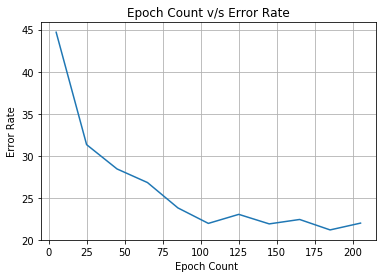

In [91]:
import matplotlib.pyplot as plt
plt.plot(epoch_counts,error_values)
# plt.figure(figsize=(30,20))
plt.xlabel('Epoch Count ')
plt.ylabel('Error Rate')
plt.title('Epoch Count v/s Error Rate')
plt.grid(True)
plt.show()

## Part 4: Plot for Number of Layers in Neural Network v/s Error :-

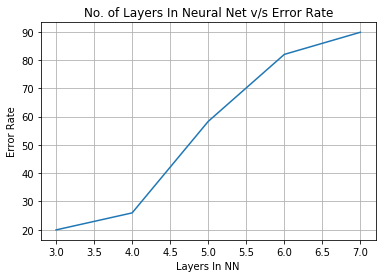

In [168]:
plt.plot([3,4,5,6,7], [19.95,25.97,58.32,82.01,89.84])
plt.xlabel('Layers In NN')
plt.ylabel('Error Rate')
plt.title('No. of Layers In Neural Net v/s Error Rate')
plt.grid(True)
plt.show()

### Part 5: Plot for Number of Layers in Neural Network v/s Prediction Loss :-

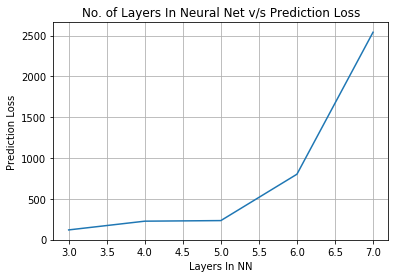

In [86]:
import matplotlib.pyplot as plt
plt.plot([3,4,5,6,7], [117.94, 225.03, 232.22, 800.58, 2540.22])
plt.xlabel('Layers In NN')
plt.ylabel('Prediction Loss')
plt.title('No. of Layers In Neural Net v/s Prediction Loss')
plt.grid(True)
plt.show()

### Part 6: Comparison of sigmoid  v/s tanh v/s ReLU Accuracy:-

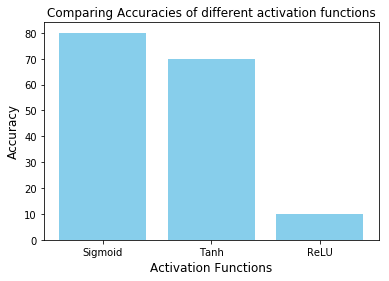

In [101]:
plt.bar(['Sigmoid','Tanh','ReLU'], [80.05,69.83,9.91], color='skyblue')
plt.xlabel('Activation Functions', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
# plt.xticks(rotation=45)
plt.title('Comparing Accuracies of different activation functions')
plt.show()

### Part 7: Prediction on test file:-

In [79]:
testing_file = pd.read_csv('Apparel/apparel-test.csv')
neural_network.forward_propagation(testing_file)
li=len(testing_file)
# print(li)
prediction_list=np.zeros([li])
for i in range(li):
    prediction_list[i]=np.argmax(neural_network.layers[-1].activations[i])
# np.unique(prediction_list)
# [int(i) for i in prediction_list]

In [80]:
np.savetxt("predicted.csv", prediction_list, delimiter=",",header='predicted_values')

In [81]:
df1=pd.read_csv("predicted.csv")

In [102]:
df1.head()

,# predicted_values
0,0.0
1,1.0
2,2.0
3,0.0
4,3.0
